In [1]:
import pandas as pd

# best dataset (by inspection, they're all statistically similar)
df = pd.read_pickle(r"C:\Users\CARRK\Documents\Repositories\AI\DataCleaning\matched_data_wo_linebreaks.pickle")

# the same dataset after cleaning
df_clean = pd.read_pickle("df_clean.pickle")

In [3]:
# statistics for similarities
def plot_stats(dataframe):
    display(dataframe.describe());
    display(dataframe['similarity'].hist(bins=30, figsize=(16, 4)));
    


BEFORE



,similarity
count,778951.00000
mean,0.84202
std,0.07236
min,0.70000
25%,0.78400
50%,0.84700
75%,0.90100
max,1.00000


<Axes: >

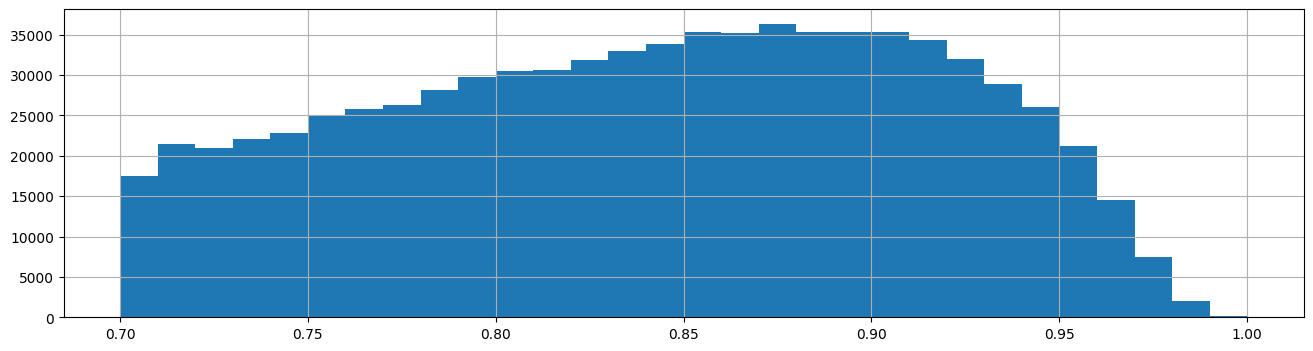

In [4]:
print("\nBEFORE\n")
plot_stats(df)


AFTER



,similarity
count,778951.000000
mean,0.842505
std,0.072309
min,0.700000
25%,0.785000
50%,0.847000
75%,0.902000
max,1.000000


<Axes: >

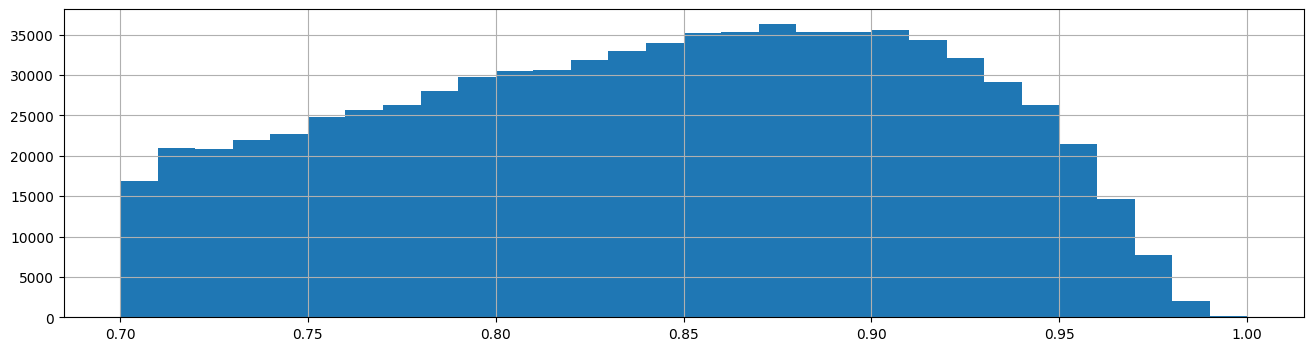

In [5]:
# hmm. that didn't clean it too much...

print("\nAFTER\n")
plot_stats(df_clean)

In [43]:
def inspect_df(dataframe, dataframe2=None, n_samples=42, min_similarity=0.0, max_similarity=0.8, only_changed=False):
    random_state=42
    
    filtered = dataframe[
        (dataframe.similarity >= min_similarity) & (dataframe.similarity <= max_similarity)
    ]
    if filtered.empty:
        print("No samples in similarity range.")
        return
    
    filtered_df = filtered.sample(
        min(n_samples, len(filtered)), random_state=random_state
    ).sort_values('similarity')
    
    for i, row in filtered_df.iterrows():
        initial_text = (
            f"similarity: {row['similarity']}\n"
            f"{row['fr']}\n"
            f"{row['en']}"
        )
        comparison_text = None
        if dataframe2 is not None:
            row2 = dataframe2.iloc[i]
            if row2['similarity'] > row['similarity']:
                comparison_text = (
                    f"\tupdated to have similarity: {row2['similarity']}\n"
                    f"\t\t{row2['fr']}\n"
                    f"\t\t{row2['en']}\n"
                    "\n"
                )

        if only_changed and comparison_text:
            print(initial_text)
            print(comparison_text)
        elif not only_changed:
            print(initial_text)
            if comparison_text:
                print(comparison_text)
            else:
                print()
        

In [44]:
inspect_df(df, df_clean)

similarity: 0.7
Le nombre d établissements d ENI varie selon les régions, celui-ci étant le plus élevé sur les côtes de l Atlantique et du Pacifique où le trafic maritime est plus important
The number of NIS establishments varies across regions, being highest on the Atlantic and Pacific coasts where vessel traffic is higher

similarity: 0.702
En 1995, le MPO a annoncé l émission de permis exploratoires, afin d'évaluer la disponibilité du crabe des neiges de taille commerciale dans la zone adjacente (eaux profondes le long du chenal Laurentien) au secteur de pêche du crabe de la zone 12
In 1995, DFO issued exploratory permits to evaluate the availability of commercial size crabs in an adjacent area (deeper waters along the Laurentian Channel) to the Area 12 snow crab fishery

similarity: 0.703
Les restrictions en fonction d une fourchette de tailles ont été évaluées en appliquant une fourchette étroite (115-125 mm) et une plus large (105-125 mm) soit à l ensemble de la population (mâles

In [45]:
inspect_df(df, df_clean, 100, .9, 1, True)

similarity: 0.901
28 iv SOMMAIRE Le présent compte rendu résume les discussions pertinentes et les principales conclusions qui ont découlé des réunions régionales d examen par les pairs du Secrétariat canadien des avis scientifiques (SCAS) de Pêches et Océans Canada (MPO) tenues du 7 au 9 juillet 2020, le 1er octobre 2020 et les 11 et 12 mars 2021
25 iv SUMMARY These Proceedings summarize the relevant discussions and key conclusions that resulted from Fisheries and Oceans Canada (DFO), Canadian Science Advisory Secretariat (CSAS) Regional Peer Review meetings on July 7-9, 2020, October 1, 2020 and March 11-12, 2021
	updated to have similarity: 0.9075466394424438
		28 iv SOMMAIRE Le présent compte rendu résume les discussions pertinentes et les principales conclusions qui ont découlé des réunions régionales d examen par les pairs du Secrétariat canadien des avis scientifiques (SCAS) de Pêches et Océans Canada (MPO) tenues du 7 au 9 juillet 2020, le 1er octobre 2020 et les 11 et 12 mars 

In [46]:
inspect_df(df, df_clean, 100, .9, 1, False)

similarity: 0.9
Les incertitudes n ont pas été combinées
Uncertainties were not combined

similarity: 0.9
L analyse des données de la population disparue et de celle réintroduite a permis d identifier des habitats importants pour chaque stade de développement
Data analysis of the extinct and the reintroduced population has helped identify important habitats for each development stage

similarity: 0.901
28 iv SOMMAIRE Le présent compte rendu résume les discussions pertinentes et les principales conclusions qui ont découlé des réunions régionales d examen par les pairs du Secrétariat canadien des avis scientifiques (SCAS) de Pêches et Océans Canada (MPO) tenues du 7 au 9 juillet 2020, le 1er octobre 2020 et les 11 et 12 mars 2021
25 iv SUMMARY These Proceedings summarize the relevant discussions and key conclusions that resulted from Fisheries and Oceans Canada (DFO), Canadian Science Advisory Secretariat (CSAS) Regional Peer Review meetings on July 7-9, 2020, October 1, 2020 and March 1

In [55]:
# what is a good threshold for training? what is "high quality"? 

delta = 5
for x, y in [(x, x + delta) for x in range(70, 100, delta)]:
    print(f'==================\nfrom {x} to {y}\n==================\n')
    inspect_df(df, df_clean, 10, x/100, y/100, False)
    print('\n')

from 70 to 75

similarity: 0.704
La proportion de vieux crabes (conditions 4 et 5) a augmenté en 2010
The proportion of old crabs (conditions 4 and 5) increased in 2010

similarity: 0.708
La simulation est fondée sur un modèle de processus de mue où la fréquence de la mue dépend des degrés-jours déterminés à partir d une analyse des données de marquage
The basis for the simulation is moult process model where moult frequency is dependent on degree days as determined from an analysis of tagging data

similarity: 0.711
Les systèmes flottants à circulation d eau continue ont donné de piètres résultats notamment en raison de bris mécaniques ou matériels
Floating flow-through bag systems have had a poor record largely because of mechanical or material failures

similarity: 0.721
La faible abondance du saumon a entraîné la suspension des allocations pour les pêches autochtones à des fins alimentaires, sociales et rituelles et de la pêche récréative depuis 1998
Low abundance of salmon has res

In [59]:
# even 70-80 looks pretty good 
#  1/20 was a sentence fragment (at 0.778)

# how many are above 80?
min_similarity = 0.8
df[df.similarity > min_similarity].shape[0], df[df.similarity > min_similarity].shape[0] / df.shape[0]

(536160, 0.688310304499256)

In [61]:
# how good was the cleaning in high quality samples? doens't look like it

delta = 5
for x, y in [(x, x + delta) for x in range(80, 100, delta)]:
    print(f'==================\nfrom {x} to {y}\n==================\n')
    inspect_df(df, df_clean, 100, x/100, y/100, True)
    print('\n')

from 80 to 85

similarity: 0.814
3 Morue du banc Georges Quoique les tendances de population soient comparables à celles de 1' année dernière, les estimations pour 1994 et 1995 sont quelque peu supérieures à ce qui avait été indiqué 1' an passé, cela notamment pour les raisons suivantes : - indices de relevé supérieurs en 1996 - exploitation réduite en 1995 diminution du nombre d'âges utilisé dans le relevé d'automne des É.-U
Although population trends are similar to last year, the estimates for 1994 and 1995 are somewhat higher than reported last year
	updated to have similarity: 0.8337788581848145
		Morue du banc Georges Quoique les tendances de population soient comparables à celles de 1' année dernière, les estimations pour 1994 et 1995 sont quelque peu supérieures à ce qui avait été indiqué 1' an passé, cela notamment pour les raisons suivantes : - indices de relevé supérieurs en 1996 - exploitation réduite en 1995 diminution du nombre d'âges utilisé dans le relevé d'automne des É

# new stuff to clean?

In [63]:
# bad translation (clauses missing from en trans)

similarity = 0.778
fr = "Les taux de gestation estimés chez les femelles de 4 ans sont faibles, tandis que chez les femelles de 5 ans et de 6 ans, ils se sont accrus au cours des années 1970, pour atteindre un sommet de 55 et de 84 , respectivement"
en = "Estimated pregnancy rates among 4 year olds are low"

print(len(en) / len(fr))

similarity = 0.814
fr = "3 Morue du banc Georges Quoique les tendances de population soient comparables à celles de 1' année dernière, les estimations pour 1994 et 1995 sont quelque peu supérieures à ce qui avait été indiqué 1' an passé, cela notamment pour les raisons suivantes : - indices de relevé supérieurs en 1996 - exploitation réduite en 1995 diminution du nombre d'âges utilisé dans le relevé d'automne des É.-U"
en = "Although population trends are similar to last year, the estimates for 1994 and 1995 are somewhat higher than reported last year"

print(len(en) / len(fr))

0.22869955156950672
0.32323232323232326


In [58]:
# good translation with large difference in len

similarity = 0.721
fr = "La faible abondance du saumon a entraîné la suspension des allocations pour les pêches autochtones à des fins alimentaires, sociales et rituelles et de la pêche récréative depuis 1998"
en = "Low abundance of salmon has resulted in no FSC allocations and no recreational fisheries since 1998"

print(len(en) / len(fr))

similarity = 0.893
fr = "La matrice de la valeur de F est convergente (la somme des valeurs de F par cohorte pour les individus de 4 ans et plus 2,0) pour les cohortes de 1973 a 1979"
en = "The F matrix is converged (sum of Fs by cohort for age 4 2.0) for the 1973 to 1979 cohorts"
    
print(len(en) / len(fr))

0.5409836065573771
0.5732484076433121


In [ ]:
# TODO: train a classifier 